## Appendix - Code for Images in the presentation

In [269]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import datetime
import warnings
import seaborn as sns
import sklearn.metrics as metrics

# custom function imports
from custom_functions import *
from regression_custom_functions import *
from eda_custom_functions import *

In [3]:
df_models = pd.read_csv('../data/cleaned_datasets/df_models.csv')

In [4]:
# Let's explore revenue to see if it followed the same general trend as overall sales
years = ['2015', '2016', '2017', '2018', '2019', '2020',
       '2021','2022']
revenue = df_models.copy()
for index in revenue.index:
    for year in years:
        revenue.loc[index,year] = (monthly_to_yearly(revenue,year)[index]*revenue.loc[index,'wholesale_price'])

yearly_revenue = revenue.groupby(by = 'collection').sum().sum()[years]

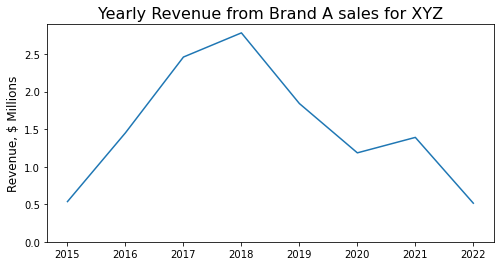

In [12]:
fig = plt.figure(figsize=(8,4))
sns.lineplot(x = yearly_revenue.index, y = yearly_revenue.values/(10**6));
plt.title("Yearly Revenue from Brand A sales for XYZ",fontsize=16)
plt.ylabel("Revenue, $ Millions",fontsize=12)
plt.ylim(bottom=0);
plt.savefig('../images/yearly_revenue')

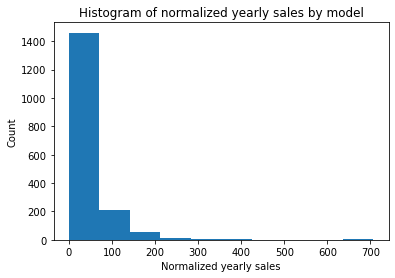

In [13]:
df_models = calc_norm_yearly_sales(df_models, 4, 2019)

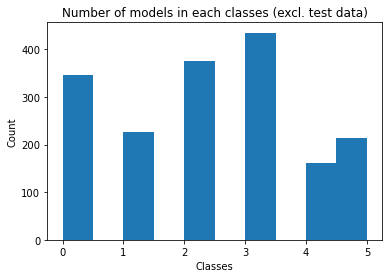

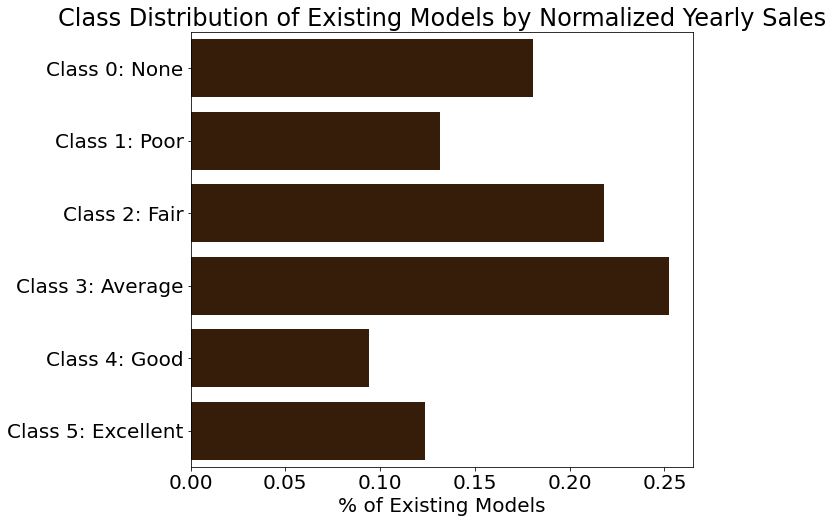

In [265]:
# Define upper bounds for normalized yearly sales to classify data
class_upper = {0:5,   # none
                   1:15,  # poor
                   2:30,  # fair
                   3:60, # average
                   4:90  # good
                  }       # excellent


# Use custom function and upper bounds to make classes
df_models['class'] = make_classes(df_models.norm_yearly_sales, class_upper)

class_dict = dict(zip(class_counts.keys(),['None','Poor','Fair','Average','Good','Excellent']))

class_counts = df_models.dropna(subset='2022-04')['class'].value_counts(normalize = True).sort_index()

fig = plt.figure(figsize=(9,8))
sns.barplot(y = [f'Class {x}: {class_dict[x]}' for x in class_counts.keys()], x = class_counts.values, 
            orient='h', color = '#3D1C02')
plt.title('Class Distribution of Existing Models by Normalized Yearly Sales',fontsize=24)
plt.xlabel('% of Existing Models',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20);

plt.savefig('../images/class_distribution_existing_bar', bbox_inches='tight')

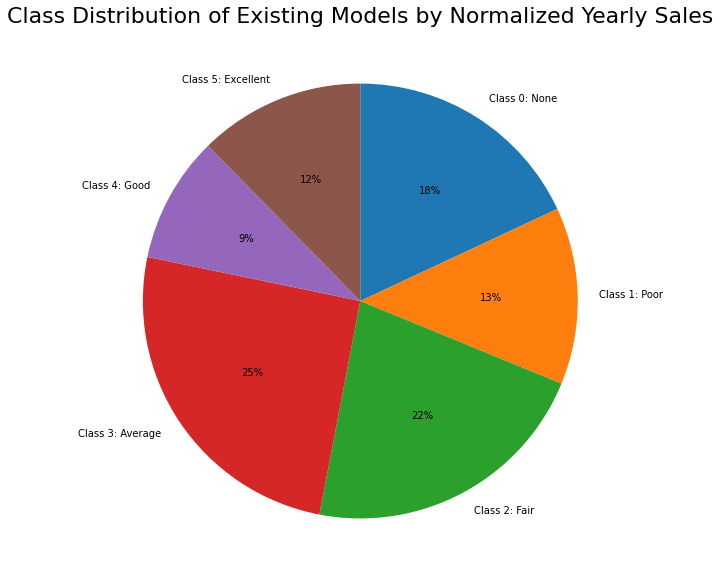

In [219]:
fig = plt.figure(figsize=(10,10))
plt.pie(class_counts,
        labels=[f'Class {x}: {class_dict[x]}' for x in class_counts.keys()],autopct=lambda p : '{:.0f}%'.format(p,p * sum(class_counts)/100),
        startangle=90, counterclock=False);
plt.title('Class Distribution of Existing Models by Normalized Yearly Sales', fontsize=22);
plt.savefig('../images/class_distribution', bbox_inches='tight')

In [293]:
new_model_predictions = pd.read_csv('../data/predictions/new_models_classifications.csv')

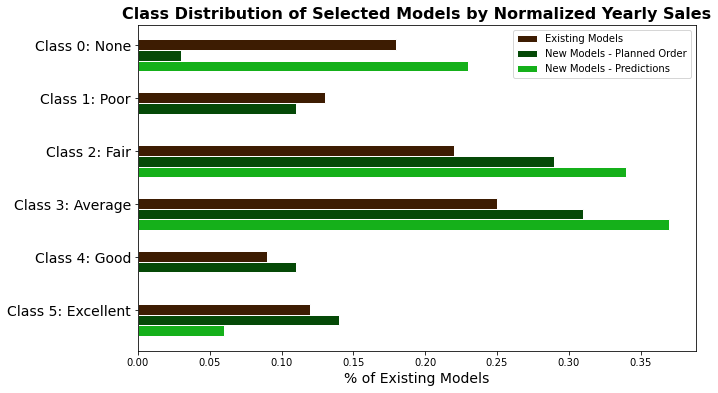

In [314]:
class_counts_planned = df_models[df_models['2022-04'].astype(str) == 'nan'].dropna(subset='availability')['planned_order'].value_counts(normalize = True).sort_index()
class_counts_preds = new_model_predictions['monthly_classifications_Q3'].value_counts(normalize = True).sort_index()

class_dist = pd.DataFrame(class_counts.values, columns=['Existing Models'])

class_dist = class_dist.merge(pd.DataFrame(class_counts_planned.values, columns=['New Models - Planned Order']), left_index=True, right_index=True, how = 'outer')

class_dist = class_dist.merge(pd.DataFrame(class_counts_preds.values, columns=['New Models - Predictions'], index=class_counts_preds.keys()), 
                              left_index=True, right_index=True, how = 'outer')

# Code modified from https://python-graph-gallery.com/11-grouped-barplot and https://datascience.stackexchange.com/questions/84727/add-labels-bar-chart and https://github.com/jupyter/notebook/issues/789
# set size of figure
plt.figure(figsize=(10,6))

# set width of bars
barWidth = 0.2
 
# set heights of bars
bars1 = [round(x,2) for x in class_dist['Existing Models']]
bars2 = [round(x,2) for x in class_dist['New Models - Planned Order']]
bars3 = [round(x,2) for x in class_dist['New Models - Predictions']]
 
# Set position of bar on X axis
br1 = np.arange(6)
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
 
# Make the plot
plt.barh(br1, bars1, color='#3D1C02', height=barWidth, edgecolor='white', label='Existing Models')
plt.barh(br2, bars2, color='#054907', height=barWidth, edgecolor='white', label='New Models - Planned Order')
plt.barh(br3, bars3, color='#15B01A', height=barWidth, edgecolor='white', label='New Models - Predictions')
 
# Add xticks on the middle of the group bars
plt.xlabel('% of Existing Models',fontsize=14)
plt.yticks(ticks=np.arange(6),labels = [f'Class {x}: {class_dict[x]}' for x in class_dist.index], fontsize=14);
plt.grid(False)
plt.gca().invert_yaxis()
 
# Create legend & Show graphic
plt.title('Class Distribution of Selected Models by Normalized Yearly Sales', fontweight='bold',fontsize=16)
plt.legend();

plt.savefig('../images/class_distribution_all', bbox_inches='tight')

In [270]:
proposal_predictions = pd.read_csv('../data/predictions/proposal_forecast.csv')

In [277]:
df_existing_models = df_models.merge(proposal_predictions, on='style_id')

In [294]:
order_sheet = pd.read_csv('../output/order_sheet.csv')

In [299]:
# Compare order to the planned order provided by XYZ
order_sheet['residuals'] = order_sheet.planned_order - order_sheet.order_quantity

In [305]:
residuals_counts = pd.DataFrame(order_sheet.residuals.value_counts(normalize=True),columns=['residuals']).sort_index()

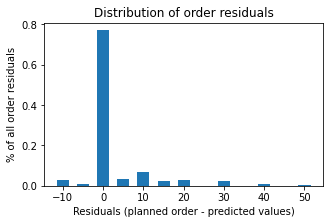

In [313]:
fig = plt.figure(figsize=(5,3))
plt.bar(residuals_counts.index.values, residuals_counts['residuals'],width=3)
plt.title('Distribution of order residuals')
plt.xlabel('Residuals (planned order - predicted values)')
plt.ylabel('% of all order residuals');
plt.savefig('../images/order_residuals_dist', bbox_inches = 'tight')

In [315]:
order_sheet.sort_values(by="residuals")

,style_id,retail_price,collection,qty_on_hand,qty_on_order,qty_total_inv,qty_sold_last_6m,qty_sold_last_6m_calc,qty_avg/mo,qty_avg/mo_calc,wholesale_price,xyz_cost,quarterly_forecast,planned_order,order_quantity,residuals
278,es5227,155.0,raquel,0,0,0,0,0,0.00,0.00,77.5,54.25,20,10,20,-10
296,fs5950,155.0,blue,0,0,0,0,0,0.00,0.00,77.5,54.25,50,40,50,-10
275,es5220,145.0,raquel,0,0,0,0,0,0.00,0.00,72.5,50.75,30,20,30,-10
276,es5221,145.0,raquel,0,0,0,0,0,0.00,0.00,72.5,50.75,30,20,30,-10
277,es5222,145.0,raquel,0,0,0,0,0,0.00,0.00,72.5,50.75,30,20,30,-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7,ch2891,139.0,coachman,2,40,42,98,65,16.33,10.87,69.5,48.65,33,30,0,30
118,fs4835,149.0,grant,34,0,34,87,47,14.50,7.94,74.5,52.15,24,40,0,40
265,es5183set,140.0,carlie,0,0,0,0,0,0.00,0.00,70.0,49.00,0,40,0,40
5,ch2564,139.0,coachman,48,0,48,108,71,18.00,11.89,69.5,48.65,36,40,0,40


In [328]:
worst_prediction = return_nondate_col(df_models[df_models.style_id == 'fs5942'])

In [321]:
lr_coefs = pd.read_csv('../data/predictions/log_reg_coefficients').set_index('Unnamed: 0')

In [331]:
attributes = ['country_of_origin','warranty', 'band_color', 'band_material',
       'case_material', 'dial_color', 'case_size', 'gender', 'color',
       'retail_price', 'collection', 'clasp_type', 'water_resistance',
       'movement_type']
worst_prediction_inputs = []
for col, val in zip(worst_prediction[attributes].columns, worst_prediction[attributes].iloc[0,:]):
    worst_prediction_inputs.append(f'{col}_{val}')
worst_prediction_inputs

['country_of_origin_japan - jp',
 'warranty_2 - year international limited warranty',
 'band_color_brown',
 'band_material_leather',
 'case_material_stainless steel',
 'dial_color_blue',
 'case_size_42.0',
 'gender_mens',
 'color_gold',
 'retail_price_155.0',
 'collection_minimalist',
 'clasp_type_buckle',
 'water_resistance_5 atm',
 'movement_type_quartz']

In [336]:
lr_coefs[['coefs_class_5']].T[worst_prediction_inputs].T

,coefs_class_5
Unnamed: 0,
country_of_origin_japan - jp,0.030579
warranty_2 - year international limited warranty,0.016643
band_color_brown,-0.027491
band_material_leather,-0.053183
case_material_stainless steel,0.027931
dial_color_blue,-0.018076
case_size_42.0,-0.018722
gender_mens,0.008353
color_gold,0.059078


In [343]:
worst_prediction_coefs = lr_coefs.T[worst_prediction_inputs].T

In [344]:
worst_prediction_coefs.sort_values('coefs_class_0')

,coefs_class_0,coefs_class_1,coefs_class_2,coefs_class_3,coefs_class_4,coefs_class_5
Unnamed: 0,,,,,,
retail_price_155.0,-0.037705,-0.022445,-0.023488,0.020377,0.056788,0.006475
band_color_brown,-0.032235,0.044721,0.058415,0.001076,-0.043741,-0.027491
movement_type_quartz,-0.012647,-0.032400,-0.025981,-0.000804,0.023213,0.048545
case_material_stainless steel,-0.009829,-0.021182,-0.010159,0.006085,0.006938,0.027931
country_of_origin_japan - jp,-0.008641,-0.032469,-0.019634,0.009866,0.019977,0.030579
collection_minimalist,-0.005156,-0.002428,0.060955,0.001171,-0.026332,-0.026481
gender_mens,0.009956,-0.072437,-0.019966,0.060364,0.012775,0.008353
warranty_2 - year international limited warranty,0.013330,-0.013874,-0.015631,-0.005057,0.004617,0.016643
water_resistance_5 atm,0.016112,-0.012135,-0.011709,-0.010006,-0.012298,0.030596
